### we have a dataset produced by a website that doing experemint to know that the change in the homepage will be better of not

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("homepage_actions.csv")

In [4]:
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### we have tow groups control and eperiment, and we need to know who is make more clicks.

 - hypothes:
           - null : no change or control group better than experiment group
           - alternative : experiment group better than control group
 - p-value = 0.01, less than this value we can regect the null hypothes

In [5]:
df.shape

(8188, 4)

### we can do all steps in all data
### we can do difference between rate of clicks in the tow groups
##### M1 - M2 <= 0 -------> null
##### M1 - M2 > 0 -----> alternative

### rate of clicks

In [25]:
# rate of clicks to unique users
# control
control = df.query('group == "control"')
con_rate = control.query('action == "click"').id.nunique() / control.query('action == "view"').id.nunique()

In [26]:
con_rate

0.2797118847539016

In [28]:
# experiment group
experiment = df.query('group == "experiment"')
exp_rate = experiment.query('action == "click"').id.nunique() / experiment.query('action == "view"').id.nunique()

In [29]:
exp_rate

0.3097463284379172

In [30]:
diff_rate =  exp_rate - con_rate
diff_rate

0.030034443684015644

#### we need to test this results, by chance or the true ? A/B testing

- bootstraping to the tow groups


In [32]:
diff = []
for i in range(10000):
    # bootstrap
    df_sample = df.sample(df.shape[0],replace = True) 
    
    # rate of clicks to unique users of control
    control_sample = df_sample.query('group == "control"')
    con_rate_sample = control_sample.query('action == "click"').id.nunique() / control_sample.query('action == "view"').id.nunique()
    
    # rate of clicks to unique users of control
    experiment_sample = df_sample.query('group == "experiment"')
    exp_rate_sample = experiment_sample.query('action == "click"').id.nunique() / experiment_sample.query('action == "view"').id.nunique()
    
    # sampling distripution
    diff.append(exp_rate_sample-con_rate_sample)

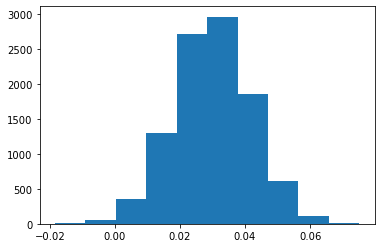

In [37]:
plt.hist(diff);

In [39]:
# normal distrpution to null hypothes
# null hypothes say no change, then the mean of this distrpution is zero
null = np.random.normal(0,np.std(diff),10000)

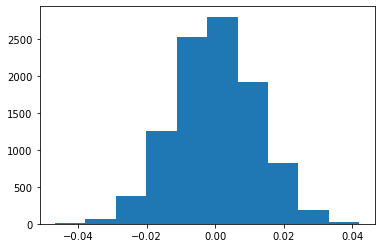

In [40]:
plt.hist(null);

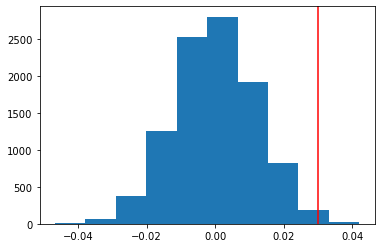

In [42]:
plt.hist(null);
plt.axvline(x=diff_rate,color='red');
plt.show()

#### by plots, we can say the null is not true, but we need to calculate the p-value

- p-value

In [45]:
# calculate it by take the mean of all  values in the null that less that our statistic
# ((we consider all the data is a smple, we can't say parameter))
p_value = (null >= diff_rate).mean()
p_value

0.0051

### p-value is less than 0.01, reject the null hypothes.